In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
jakbar_analisis=pd.read_excel('Jakbar_Analisis.xlsx')
jakbar_analisis.head()

,Minggu ke,Tanggal,Jumlah Kasus DBD (y),Average of Tavg,Average of Rhavg,Sum of RR,Average of ss,Sum of pengguna krl,Jumlah Kasus DBD Lag 1,Jumlah Kasus DBD Lag 2,Jumlah Kasus DBD Lag 3,Jumlah Kasus DBD Lag 4,Jumlah Kasus DBD Lag 5,Jumlah Kasus DBD Lag 6,Jumlah Kasus DBD Lag 7,Jumlah Kasus DBD Lag 8
0,14,30/03/2008 - 05/04/2008,86,26.771429,81.428571,0.6,2.930952,4.692709,52,29,51,67,47,54,75,60
1,15,06/04/2008 - 12/04/2008,98,25.900000,83.285714,387.7,1.404762,4.412848,86,52,29,51,67,47,54,75
2,16,13/04/2008 - 19/04/2008,83,26.214286,85.000000,116.1,0.852381,4.266629,98,86,52,29,51,67,47,54
3,17,20/04/2008 - 26/04/2008,58,26.585714,83.428571,98.4,1.675000,4.089555,83,98,86,52,29,51,67,47
4,18,27/04/2008 - 03/05/2008,130,27.128571,82.142857,147.5,1.925714,3.711553,58,83,98,86,52,29,51,67


In [3]:
jakbar_analisis_lag_1=jakbar_analisis.iloc[0:822:,2:9]
jakbar_analisis_lag_2=jakbar_analisis.iloc[0:822:,[2,3,4,5,6,7,9]]
jakbar_analisis_lag_3=jakbar_analisis.iloc[0:822:,[2,3,4,5,6,7,10]]
jakbar_analisis_lag_4=jakbar_analisis.iloc[0:822:,[2,3,4,5,6,7,11]]
jakbar_analisis_lag_5=jakbar_analisis.iloc[0:822:,[2,3,4,5,6,7,12]]
jakbar_analisis_lag_6=jakbar_analisis.iloc[0:822:,[2,3,4,5,6,7,13]]
jakbar_analisis_lag_7=jakbar_analisis.iloc[0:822:,[2,3,4,5,6,7,14]]
jakbar_analisis_lag_8=jakbar_analisis.iloc[0:822:,[2,3,4,5,6,7,15]]
jakbar_analisis_lag_8.tail()

,Jumlah Kasus DBD (y),Average of Tavg,Average of Rhavg,Sum of RR,Average of ss,Sum of pengguna krl,Jumlah Kasus DBD Lag 8
817,20,29.285714,64.142857,0.0,8.014286,2.231485,25
818,19,30.171429,72.428571,0.0,6.571429,2.475546,36
819,21,30.542857,70.714286,0.0,6.885714,2.682807,29
820,21,29.959524,66.000000,0.0,6.914286,2.893372,21
821,34,29.828571,70.261905,0.0,6.057143,3.147676,24


In [13]:
import numpy as np
import pandas as pd
from IPython.display import clear_output
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

split_point = int(0.7 * len(jakbar_analisis_lag_4))
train = jakbar_analisis_lag_4[:split_point]
test = jakbar_analisis_lag_4[split_point:]
X_train = train.drop('Jumlah Kasus DBD (y)', axis=1)
y_train = train['Jumlah Kasus DBD (y)']
X_test = test.drop('Jumlah Kasus DBD (y)', axis=1)
y_test = test['Jumlah Kasus DBD (y)']

n_estimators = range(1, 823,10)
max_depth = range(1, 101)
min_samples_split = range(2, 14)
min_samples_leaf = range(1, 7)
max_features = [None, 'sqrt']
bootstrap = [True]

total_iterations = (len(n_estimators) * len(max_depth) * 
                    len(min_samples_split) * len(min_samples_leaf) * 
                    len(max_features) * len(bootstrap))

best_params = {}
best_r2_train = float("-inf")
best_r2_test = float("-inf")
best_s = float("-inf")
k = 0

# DataFrame untuk menyimpan hasil tuning
results = pd.DataFrame(columns=[
    'n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf',
    'max_features', 'bootstrap', 'R2_train', 'R2_test', 'R2_total'
])

# Modifikasi loop tuning
for n in n_estimators:
    for depth in max_depth:
        for split in min_samples_split:
            for leaf in min_samples_leaf:
                for feature in max_features:
                    for boot in bootstrap:
                        
                        # Clear output and print progress
                        k += 1
                        clear_output(wait=True)
                        
                        percent_complete = (k / total_iterations) * 100
                        print(f"Progress: {k}/{total_iterations} iterations completed ({percent_complete:.2f}%)")
                        
                        # Buat model dan fit ke data
                        model = RandomForestRegressor(
                            n_estimators=n,
                            max_depth=depth,
                            min_samples_split=split,
                            min_samples_leaf=leaf,
                            max_features=feature,
                            bootstrap=boot,
                            n_jobs=-1,
                            random_state=42
                        )
                        model.fit(X_train, y_train)

                        # Prediksi dan hitung R^2
                        y_train_pred = model.predict(X_train)
                        y_test_pred = model.predict(X_test)
                        r2_train = r2_score(y_train, y_train_pred)
                        r2_test = r2_score(y_test, y_test_pred)
                        total_r2 = r2_test + r2_train

                        # Simpan hasil ke DataFrame
                        results = pd.concat([results, pd.DataFrame([{
                            'n_estimators': n,
                            'max_depth': depth,
                            'min_samples_split': split,
                            'min_samples_leaf': leaf,
                            'max_features': feature,
                            'bootstrap': boot,
                            'R2_train': r2_train,
                            'R2_test': r2_test,
                            'R2_total': total_r2
                        }])], ignore_index=True)

                        # Perbarui parameter terbaik jika R^2 total lebih tinggi
                        if total_r2 > best_s:
                            best_s = total_r2
                            best_r2_train = r2_train
                            best_r2_test = r2_test
                            best_params = {
                                'n_estimators': n,
                                'max_depth': depth,
                                'min_samples_split': split,
                                'min_samples_leaf': leaf,
                                'max_features': feature,
                                'bootstrap': boot
                            }
                        del model

# Setelah selesai, simpan DataFrame ke file CSV atau langsung gunakan untuk grafik
results.to_csv("tuning_results2.csv", index=False)  # Menyimpan hasil ke file CSV

print("Best Parameters for R² Total:", best_params)
print("Best R² Total:", best_s)
print("Best R² Train:", best_r2_train)
print("Best R² Test:", best_r2_test)

Progress: 1195200/1195200 iterations completed (100.00%)
Best Parameters for R² Total: {'n_estimators': 191, 'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': True}
Best R² Total: 1.545407799613115
Best R² Train: 0.9563444478525601
Best R² Test: 0.5890633517605549


In [4]:
jakbar_analisis=pd.read_excel('Jakbar_Analisis.xlsx')
jakbar_analisis.head()

,Minggu ke,Tanggal,Jumlah Kasus DBD (y),Average of Tavg,Average of Rhavg,Sum of RR,Average of ss,Sum of pengguna krl,Jumlah Kasus DBD Lag 1,Jumlah Kasus DBD Lag 2,Jumlah Kasus DBD Lag 3,Jumlah Kasus DBD Lag 4,Jumlah Kasus DBD Lag 5,Jumlah Kasus DBD Lag 6,Jumlah Kasus DBD Lag 7,Jumlah Kasus DBD Lag 8
0,14,30/03/2008 - 05/04/2008,86,26.771429,81.428571,0.6,2.930952,4.692709,52,29,51,67,47,54,75,60
1,15,06/04/2008 - 12/04/2008,98,25.900000,83.285714,387.7,1.404762,4.412848,86,52,29,51,67,47,54,75
2,16,13/04/2008 - 19/04/2008,83,26.214286,85.000000,116.1,0.852381,4.266629,98,86,52,29,51,67,47,54
3,17,20/04/2008 - 26/04/2008,58,26.585714,83.428571,98.4,1.675000,4.089555,83,98,86,52,29,51,67,47
4,18,27/04/2008 - 03/05/2008,130,27.128571,82.142857,147.5,1.925714,3.711553,58,83,98,86,52,29,51,67


In [5]:
jakbar_analisis_lag_1=jakbar_analisis.iloc[0:822:,2:9]
jakbar_analisis_lag_2=jakbar_analisis.iloc[0:822:,[2,3,4,5,6,7,9]]
jakbar_analisis_lag_3=jakbar_analisis.iloc[0:822:,[2,3,4,5,6,7,10]]
jakbar_analisis_lag_4=jakbar_analisis.iloc[0:822:,[2,3,4,5,6,7,11]]
jakbar_analisis_lag_5=jakbar_analisis.iloc[0:822:,[2,3,4,5,6,7,12]]
jakbar_analisis_lag_6=jakbar_analisis.iloc[0:822:,[2,3,4,5,6,7,13]]
jakbar_analisis_lag_7=jakbar_analisis.iloc[0:822:,[2,3,4,5,6,7,14]]
jakbar_analisis_lag_8=jakbar_analisis.iloc[0:822:,[2,3,4,5,6,7,15]]
jakbar_analisis_lag_8.tail()

,Jumlah Kasus DBD (y),Average of Tavg,Average of Rhavg,Sum of RR,Average of ss,Sum of pengguna krl,Jumlah Kasus DBD Lag 8
817,20,29.285714,64.142857,0.0,8.014286,2.231485,25
818,19,30.171429,72.428571,0.0,6.571429,2.475546,36
819,21,30.542857,70.714286,0.0,6.885714,2.682807,29
820,21,29.959524,66.000000,0.0,6.914286,2.893372,21
821,34,29.828571,70.261905,0.0,6.057143,3.147676,24


In [6]:
import numpy as np
import pandas as pd
from IPython.display import clear_output
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

split_point = int(0.7 * len(jakbar_analisis_lag_4))
train = jakbar_analisis_lag_4[:split_point]
test = jakbar_analisis_lag_4[split_point:]
X_train = train.drop('Jumlah Kasus DBD (y)', axis=1)
y_train = train['Jumlah Kasus DBD (y)']
X_test = test.drop('Jumlah Kasus DBD (y)', axis=1)
y_test = test['Jumlah Kasus DBD (y)']

model=RandomForestRegressor(n_estimators=191,max_depth=17,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',bootstrap=True,random_state=42)
model.fit(X_train, y_train)
# Prediksi dan hitung R^2
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
total_r2 = r2_test + r2_train

print(r2_train)
print(r2_test)
print(total_r2)

0.9563444478525601
0.589063351760555
1.5454077996131153


In [9]:
import numpy as np
import pandas as pd
from IPython.display import clear_output
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

split_point = int(0.7 * len(jakbar_analisis_lag_4))
train = jakbar_analisis_lag_4[:split_point]
test = jakbar_analisis_lag_4[split_point:]
X_train = train.drop('Jumlah Kasus DBD (y)', axis=1)
y_train = train['Jumlah Kasus DBD (y)']
X_test = test.drop('Jumlah Kasus DBD (y)', axis=1)
y_test = test['Jumlah Kasus DBD (y)']

model=RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
# Prediksi dan hitung R^2
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
total_r2 = r2_test + r2_train

print(r2_train)
print(r2_test)

0.9570898963773244
0.3893527184061062


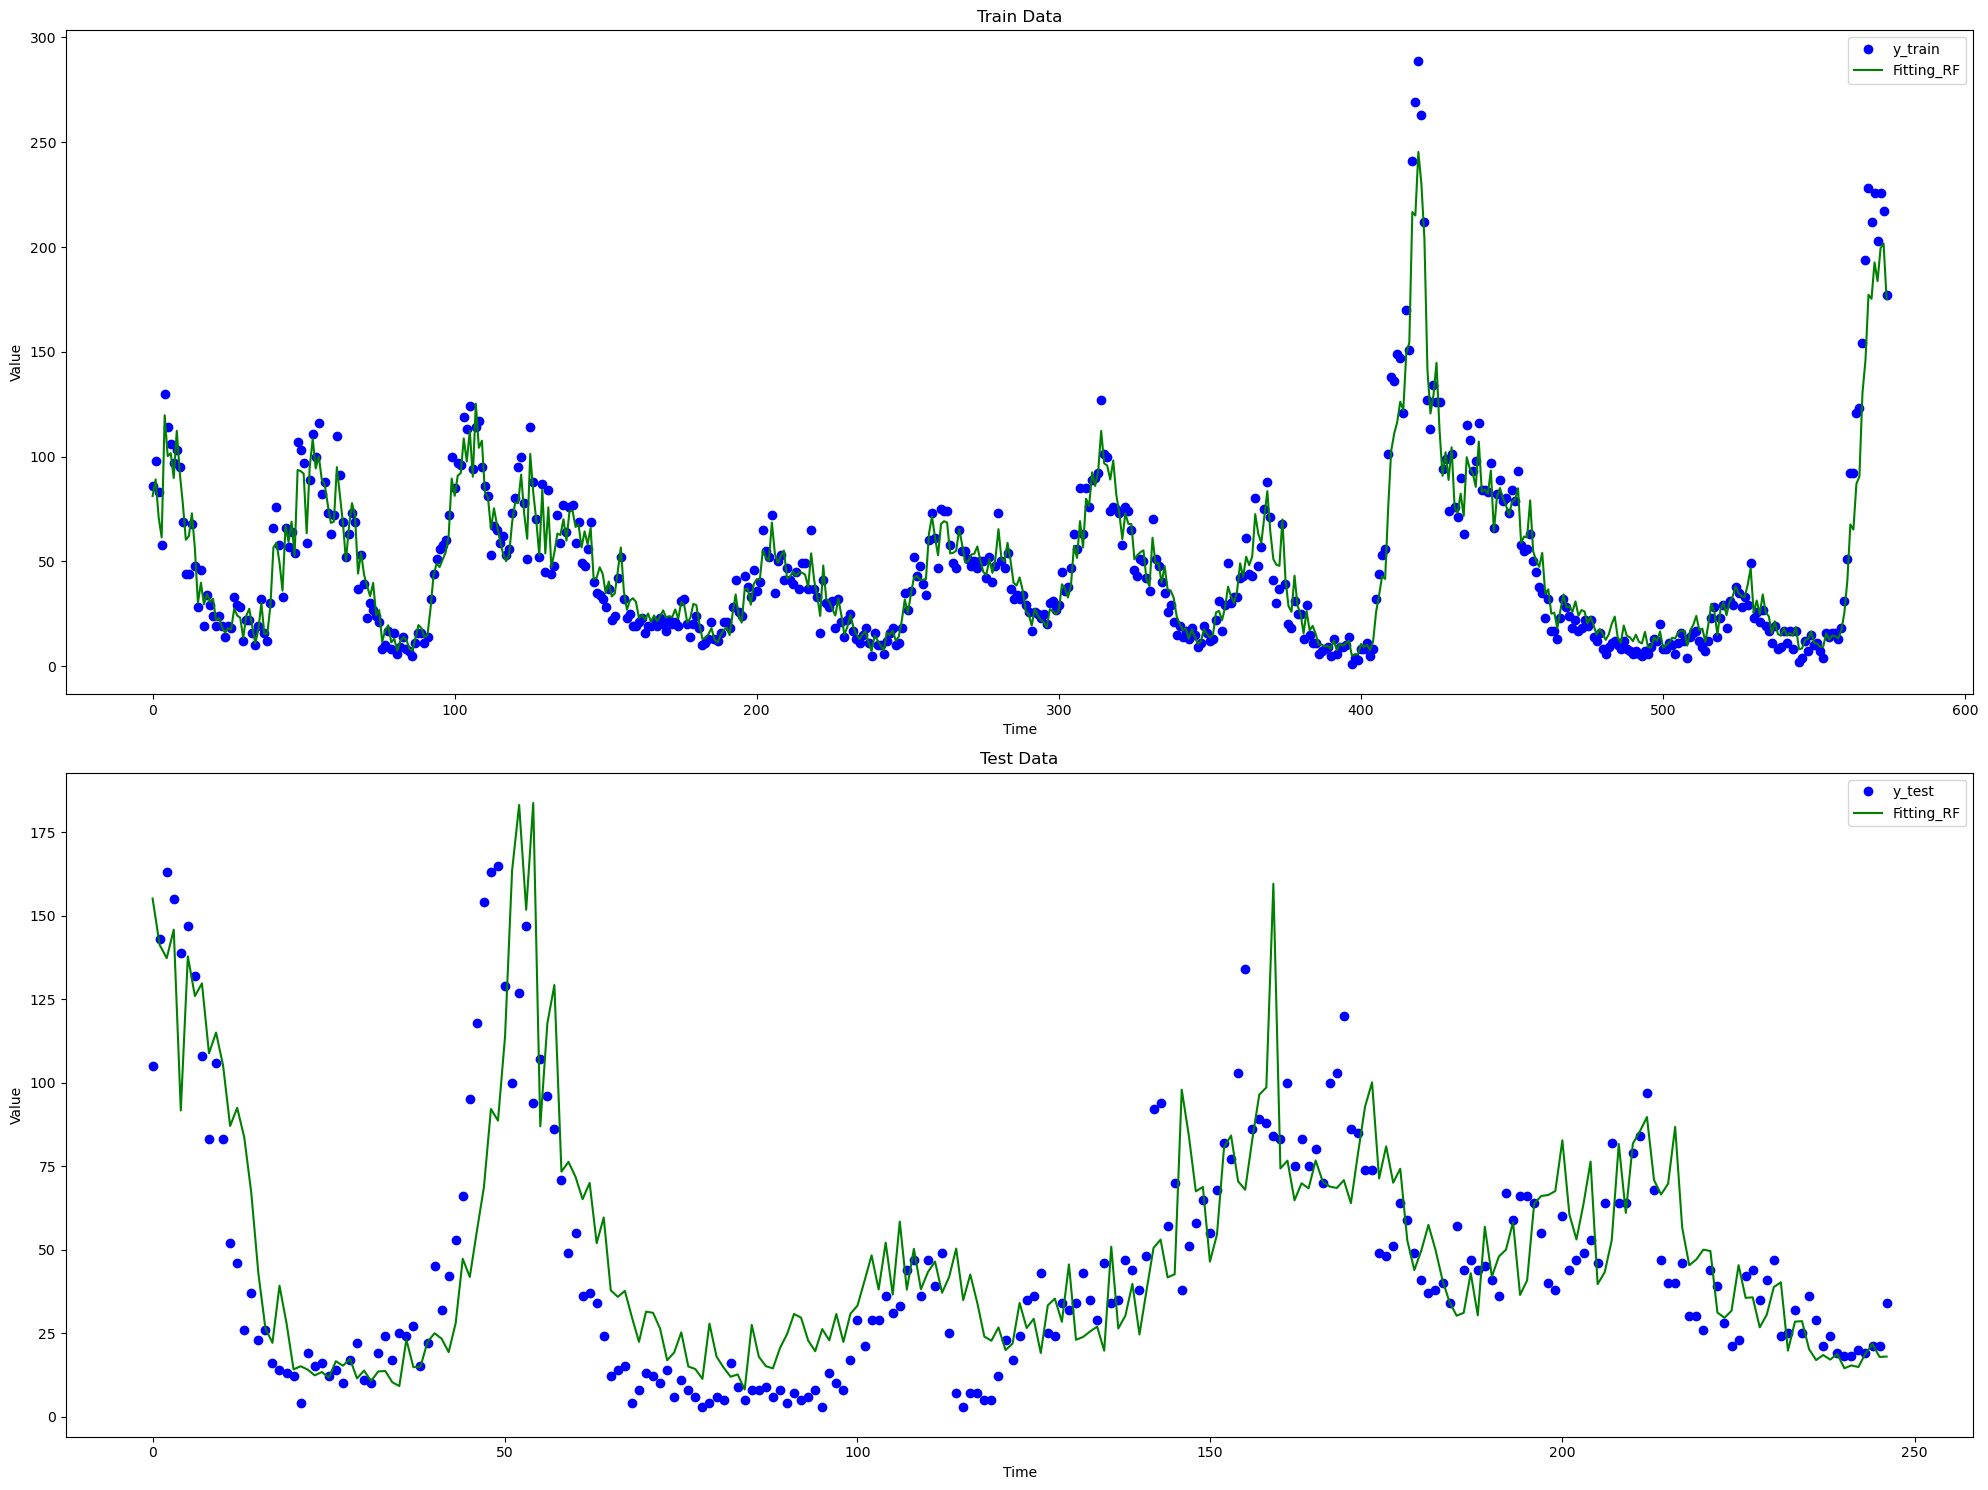

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Asumsi data Anda
time_train = np.arange(0, 575, 1)
time_test = np.arange(0, 247, 1)

# Ukuran figure dan subplots
fig, axes = plt.subplots(2, 1, figsize=(20, 15))  # 2 baris, 1 kolom

time_actual = np.arange(0, 577 + 248, 1)  # Gabungan train dan test
y_actual = np.concatenate([y_train, y_test])  # Gabungkan data train dan test

# Plot pertama: Data train
axes[0].plot(time_train, y_train, 'bo', label='y_train')
axes[0].plot(time_train, y_train_pred, 'g-', label='Fitting_RF')
axes[0].set_title("Train Data")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Value")
axes[0].legend()

# Plot kedua: Data test
axes[1].plot(time_test, y_test, 'bo', label='y_test')
axes[1].plot(time_test, y_test_pred, 'g-', label='Fitting_RF')
axes[1].set_title("Test Data")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Value")
axes[1].legend()

# Mengatur tata letak agar tidak overlap
plt.tight_layout()

plt.savefig('Jakbar_RF', dpi=300, bbox_inches='tight')

# Menampilkan plot
plt.show()


In [8]:
jakbar_copula=pd.read_excel("Jakbar_Copula.xlsx")
jakbar_copula_2=jakbar_copula.iloc[0:822:,[2,3,4,5,6,7,11,16]]
jakbar_copula_2.head()

,Jumlah Kasus DBD (y),Average of Tavg,Average of Rhavg,Sum of RR,Average of ss,Sum of pengguna krl,Jumlah Kasus DBD Lag 4,Jumlah_Kasus_Timur
0,86,26.771429,81.428571,0.6,2.930952,4.692709,67,199
1,98,25.900000,83.285714,387.7,1.404762,4.412848,51,223
2,83,26.214286,85.000000,116.1,0.852381,4.266629,29,181
3,58,26.585714,83.428571,98.4,1.675000,4.089555,52,159
4,130,27.128571,82.142857,147.5,1.925714,3.711553,86,253


In [9]:
import numpy as np
import pandas as pd
from IPython.display import clear_output
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

split_point = int(0.7 * len(jakbar_copula_2))
train = jakbar_copula_2[:split_point]
test = jakbar_copula_2[split_point:]
X_train = train.drop('Jumlah Kasus DBD (y)', axis=1)
y_train = train['Jumlah Kasus DBD (y)']
X_test = test.drop('Jumlah Kasus DBD (y)', axis=1)
y_test = test['Jumlah Kasus DBD (y)']

model=RandomForestRegressor(n_estimators=191,max_depth=17,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',bootstrap=True,random_state=42)
model.fit(X_train, y_train)
# Prediksi dan hitung R^2
y_train_pred_2 = model.predict(X_train)
y_test_pred_2 = model.predict(X_test)
r2_train = r2_score(y_train, y_train_pred_2)
r2_test = r2_score(y_test, y_test_pred_2)
total_r2 = r2_test + r2_train

print(r2_train)
print(r2_test)
print(total_r2)


0.9760468073565844
0.6609090210291664
1.6369558283857508


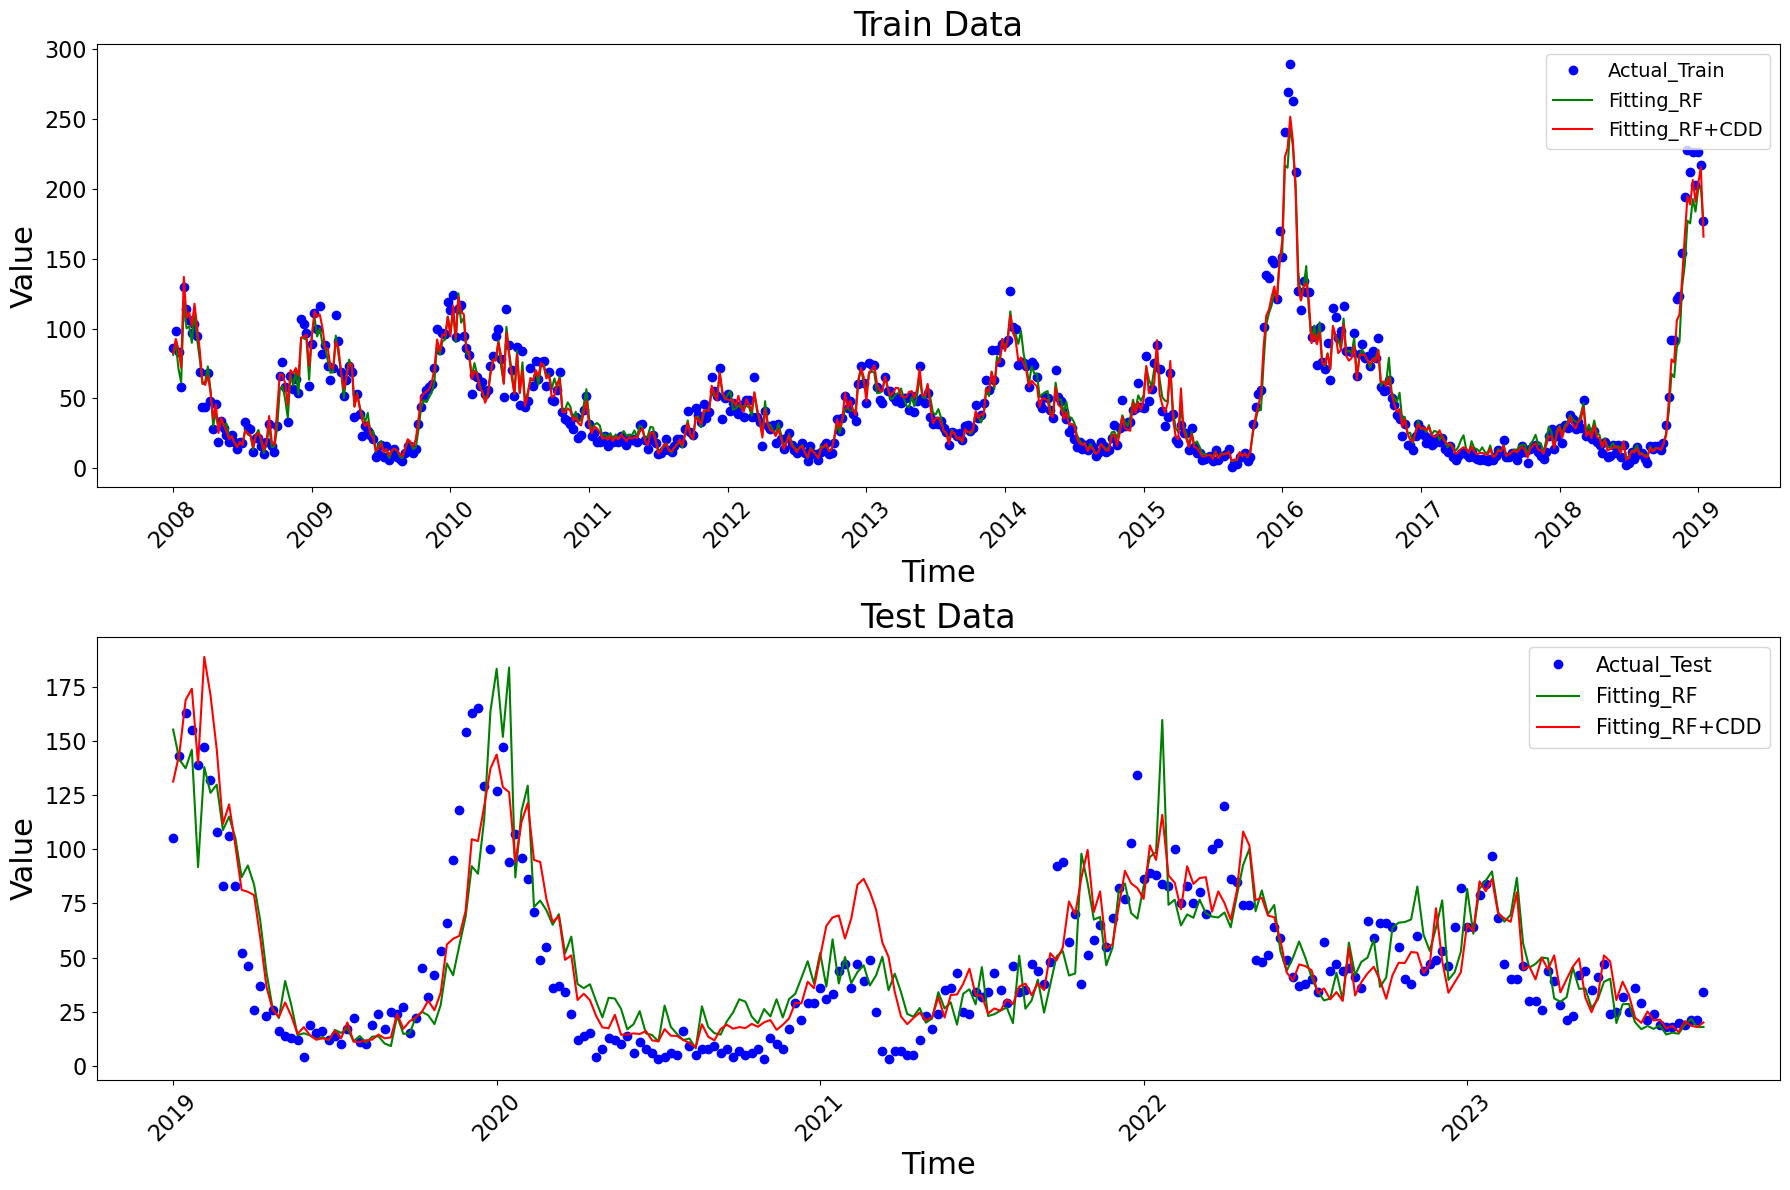

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

tanggal=jakbar_analisis.iloc[0:822:,1]
tanggal.tail()

# Total panjang yang diinginkan
train_length = 575
test_length = 247

# Membagi menjadi train dan test
time_train = tanggal[:train_length]
time_test = tanggal[train_length:train_length + test_length]
# Pastikan time_train dan time_test dalam format string
time_train = time_train.astype(str)
time_test = time_test.astype(str)

# Ekstrak tahun dari data time_train dan time_test (contoh format: "26/11/2023 - 02/12/2023")
time_train_years = [t.split("/")[-1].split(" - ")[-1] for t in time_train]
time_test_years = [t.split("/")[-1].split(" - ")[-1] for t in time_test]

# Plot data
fig, axes = plt.subplots(2, 1, figsize=(18, 12))  # 2 baris, 1 kolom

# Plot pertama: Data train
axes[0].plot(time_train, y_train, 'bo', label='Actual_Train')
axes[0].plot(time_train, y_train_pred, 'g-', label='Fitting_RF')
axes[0].plot(time_train, y_train_pred_2, 'r-', label='Fitting_RF+CDD')
axes[0].set_title("Train Data", fontsize=24)
axes[0].set_xlabel("Time", fontsize=22)
axes[0].set_ylabel("Value", fontsize=22)
axes[0].legend(fontsize=14)

# Atur ticks untuk data train
xticks_train = np.arange(0, len(time_train), 52)  # Setiap 52 minggu
axes[0].set_xticks(xticks_train)
axes[0].set_xticklabels([time_train_years[i] for i in xticks_train])

# Plot kedua: Data test
axes[1].plot(time_test, y_test, 'bo', label='Actual_Test')
axes[1].plot(time_test, y_test_pred, 'g-', label='Fitting_RF')
axes[1].plot(time_test, y_test_pred_2, 'r-', label='Fitting_RF+CDD')
axes[1].set_title("Test Data", fontsize=24)
axes[1].set_xlabel("Time", fontsize=22)
axes[1].set_ylabel("Value", fontsize=22)
axes[1].legend(fontsize=15)

# Atur ticks untuk data test
xticks_test = np.arange(0, len(time_test), 52)  # Setiap 52 minggu
axes[1].set_xticks(xticks_test)
axes[1].set_xticklabels([time_test_years[i] for i in xticks_test])

# Rotasi label untuk rapi
axes[0].tick_params(axis='x', rotation=45,labelsize=16)
axes[1].tick_params(axis='x', rotation=45,labelsize=16)

axes[0].tick_params(axis='y',labelsize=16)
axes[1].tick_params(axis='y',labelsize=16)

# Mengatur tata letak agar tidak overlap
plt.tight_layout()

# Menyimpan plot
plt.savefig('Jakbar_RF_CDD', dpi=300, bbox_inches='tight')
with PdfPages('Jakbar_RF_CDD.pdf') as pdf:
    pdf.savefig()  # Save the current figure to the PDF

# Menampilkan plot
plt.show()


In [10]:
import numpy as np
import pandas as pd
from IPython.display import clear_output
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

split_point = int(0.7 * len(jakbar_copula_2))
train = jakbar_copula_2[:split_point]
test = jakbar_copula_2[split_point:]
X_train = train.drop('Jumlah Kasus DBD (y)', axis=1)
y_train = train['Jumlah Kasus DBD (y)']
X_test = test.drop('Jumlah Kasus DBD (y)', axis=1)
y_test = test['Jumlah Kasus DBD (y)']

n_estimators = range(1, 823, 10)
max_depth = range(1, 101)
min_samples_split = range(2, 14)
min_samples_leaf = range(1, 7)
max_features = [None, 'sqrt']
bootstrap = [True]

total_iterations = (len(n_estimators) * len(max_depth) * 
                    len(min_samples_split) * len(min_samples_leaf) * 
                    len(max_features) * len(bootstrap))

best_params = {}
best_r2_train = float("-inf")
best_r2_test = float("-inf")
best_s = float("-inf")
k = 0

# DataFrame untuk menyimpan hasil tuning
results = pd.DataFrame(columns=[
    'n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf',
    'max_features', 'bootstrap', 'R2_train', 'R2_test', 'R2_total'
])

# Modifikasi loop tuning
for n in n_estimators:
    for depth in max_depth:
        for split in min_samples_split:
            for leaf in min_samples_leaf:
                for feature in max_features:
                    for boot in bootstrap:
                        
                        # Clear output and print progress
                        k += 1
                        clear_output(wait=True)
                        
                        percent_complete = (k / total_iterations) * 100
                        print(f"Progress: {k}/{total_iterations} iterations completed ({percent_complete:.2f}%)")
                        
                        # Buat model dan fit ke data
                        model = RandomForestRegressor(
                            n_estimators=n,
                            max_depth=depth,
                            min_samples_split=split,
                            min_samples_leaf=leaf,
                            max_features=feature,
                            bootstrap=boot,
                            n_jobs=-1,
                            random_state=42
                        )
                        model.fit(X_train, y_train)

                        # Prediksi dan hitung R^2
                        y_train_pred = model.predict(X_train)
                        y_test_pred = model.predict(X_test)
                        r2_train = r2_score(y_train, y_train_pred)
                        r2_test = r2_score(y_test, y_test_pred)
                        total_r2 = r2_test + r2_train

                        # Simpan hasil ke DataFrame
                        results = pd.concat([results, pd.DataFrame([{
                            'n_estimators': n,
                            'max_depth': depth,
                            'min_samples_split': split,
                            'min_samples_leaf': leaf,
                            'max_features': feature,
                            'bootstrap': boot,
                            'R2_train': r2_train,
                            'R2_test': r2_test,
                            'R2_total': total_r2
                        }])], ignore_index=True)

                        # Perbarui parameter terbaik jika R^2 total lebih tinggi
                        if total_r2 > best_s:
                            best_s = total_r2
                            best_r2_train = r2_train
                            best_r2_test = r2_test
                            best_params = {
                                'n_estimators': n,
                                'max_depth': depth,
                                'min_samples_split': split,
                                'min_samples_leaf': leaf,
                                'max_features': feature,
                                'bootstrap': boot
                            }
                        del model

# Setelah selesai, simpan DataFrame ke file CSV atau langsung gunakan untuk grafik
results.to_csv("tuning_results3.csv", index=False)  # Menyimpan hasil ke file CSV

print("Best Parameters for R² Total:", best_params)
print("Best R² Total:", best_s)
print("Best R² Train:", best_r2_train)
print("Best R² Test:", best_r2_test)

Progress: 240/1195200 iterations completed (0.02%)


KeyboardInterrupt: 

In [9]:
import numpy as np
import pandas as pd
from IPython.display import clear_output
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

split_point = int(0.7 * len(jakbar_copula_2))
train = jakbar_copula_2[:split_point]
test = jakbar_copula_2[split_point:]
X_train = train.drop('Jumlah Kasus DBD (y)', axis=1)
y_train = train['Jumlah Kasus DBD (y)']
X_test = test.drop('Jumlah Kasus DBD (y)', axis=1)
y_test = test['Jumlah Kasus DBD (y)']

model=RandomForestRegressor(n_estimators=111,max_depth=18,min_samples_split=3,min_samples_leaf=1,max_features='sqrt',bootstrap=True,random_state=42)
model.fit(X_train, y_train)
# Prediksi dan hitung R^2
y_train_pred_2 = model.predict(X_train)
y_test_pred_2 = model.predict(X_test)
r2_train = r2_score(y_train, y_train_pred_2)
r2_test = r2_score(y_test, y_test_pred_2)
total_r2 = r2_test + r2_train

print(r2_train)
print(r2_test)
print(total_r2)


0.9711875448085548
0.6770576494883583
1.6482451942969132
